In [126]:
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt


#removes all paranthesis and commas from the data, convert to float values
#assumes that a an opening paranthesis indicates a negative number
def make_float(x):
    if type(x) is float: #ignore exsiting 'nan'/float values
        return
    if "-" in x: #dash means there is no data for that year
        return float('nan')
    return float(x.replace("(", "-").replace(",","").replace(")",""))

city_budget = pd.read_csv('city_budget_data.csv')

city_budget["2015"] = city_budget["2015"].apply(make_float)
city_budget["2016"] = city_budget["2016"].apply(make_float)
city_budget["2017"] = city_budget["2017"].apply(make_float)
city_budget["2018"] = city_budget["2018"].apply(make_float)


fire_budget = city_budget[city_budget["Agency"] == "30 -  FIRE"]
fire_budget.reset_index(drop=True)

revenue_by_account_type = fire_budget[fire_budget["Account Type"] == "Revenue"].groupby(['Object']).sum()
expense_by_account_type = fire_budget[fire_budget["Account Type"] == "Expense"].groupby(['Object']).sum()

print("Revenue: " + str(revenue_by_account_type["2018"].sum()))
print("Expenses: " + str(expense_by_account_type["2018"].sum()))

print("Total: " + str(revenue_by_account_type["2018"].sum() + expense_by_account_type["2018"].sum()))

pd.options.display.max_rows = 7000
fire_budget


Revenue: -1690023.0
Expenses: 55214906.0
Total: 53524883.0


,Agency,Organization,Account Type,Character Code,Object,2015,2016,2017,2018
7,30 - FIRE,30252 - FIRE INSPECTION ELEVATOR,Revenue,44 - LICENSES AND PERMITS,44230 - ELEVATOR PERMITS AND INSPECTS,-617670.0,-606447.0,-534775.0,-555937.0
10,30 - FIRE,30240 - FIRE GENERAL PREVENTION,Revenue,44 - LICENSES AND PERMITS,44245 - FIRE PERMITS,-396640.0,-416396.0,-401755.0,-553480.0
41,30 - FIRE,30240 - FIRE GENERAL PREVENTION,Revenue,47 - MISC REVENUE,47190 - MISCELLANEOUS REVENUE,-95363.0,-103890.0,-92455.0,-135419.0
50,30 - FIRE,30120 - FIRE MEDICAL PROGRAM GENERAL,Revenue,43 - CHARGES FOR SERVICES,43225 - SPECIAL DUTY,-83384.0,-104093.0,-128038.0,-73087.0
64,30 - FIRE,30114 - FIRE HAZARDOUS INCIDENT TEAM,Revenue,42 - INTERGOV REVENUES,42410 - OTHER UNIT OF GOV REVENUES OP,-57023.0,-61862.0,-56914.0,-45007.0
79,30 - FIRE,30110 - FIRE GEN FIELD OP,Revenue,42 - INTERGOV REVENUES,42210 - STATE REVENUES OPERATING,-47469.0,NaN,NaN,NaN
84,30 - FIRE,30110 - FIRE GEN FIELD OP,Revenue,43 - CHARGES FOR SERVICES,43710 - REIMBURSEMENT OF EXPENSE,-44871.0,-58561.0,-41825.0,-57251.0
98,30 - FIRE,30120 - FIRE MEDICAL PROGRAM GENERAL,Revenue,43 - CHARGES FOR SERVICES,43710 - REIMBURSEMENT OF EXPENSE,-35083.0,-68402.0,-65906.0,-48118.0
119,30 - FIRE,30121 - FIRE MEDICAL PROGRAM STATE,Revenue,42 - INTERGOV REVENUES,42210 - STATE REVENUES OPERATING,-24649.0,-28347.0,-25266.0,-22656.0
120,30 - FIRE,30251 - FIRE INSPECTION TANK PROGRAM,Revenue,42 - INTERGOV REVENUES,42210 - STATE REVENUES OPERATING,-24610.0,-24887.0,-28602.0,-29697.0


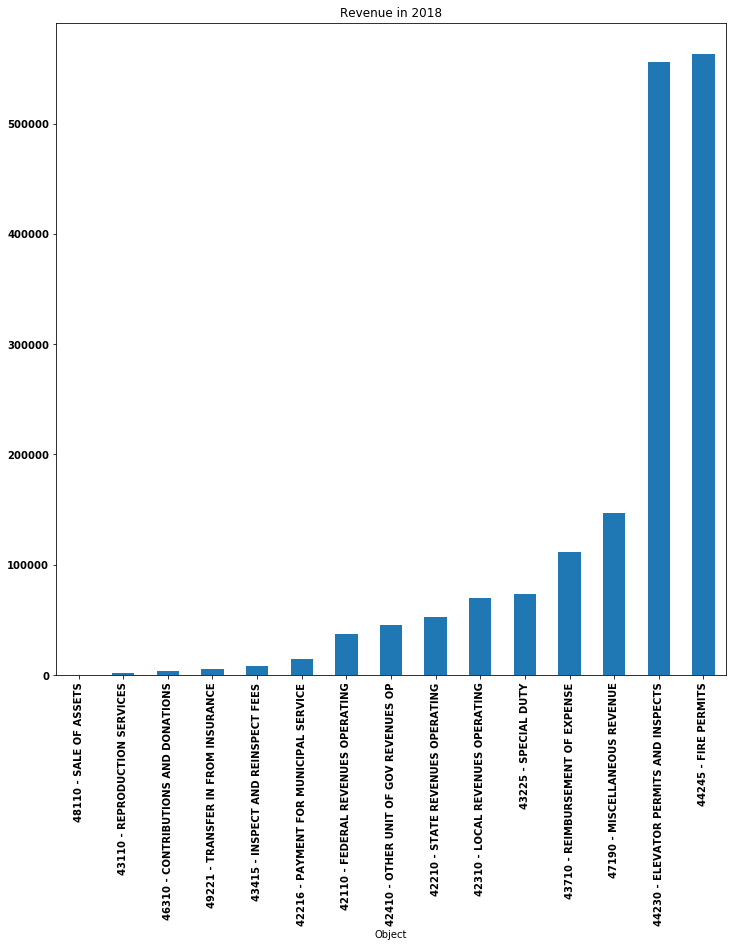

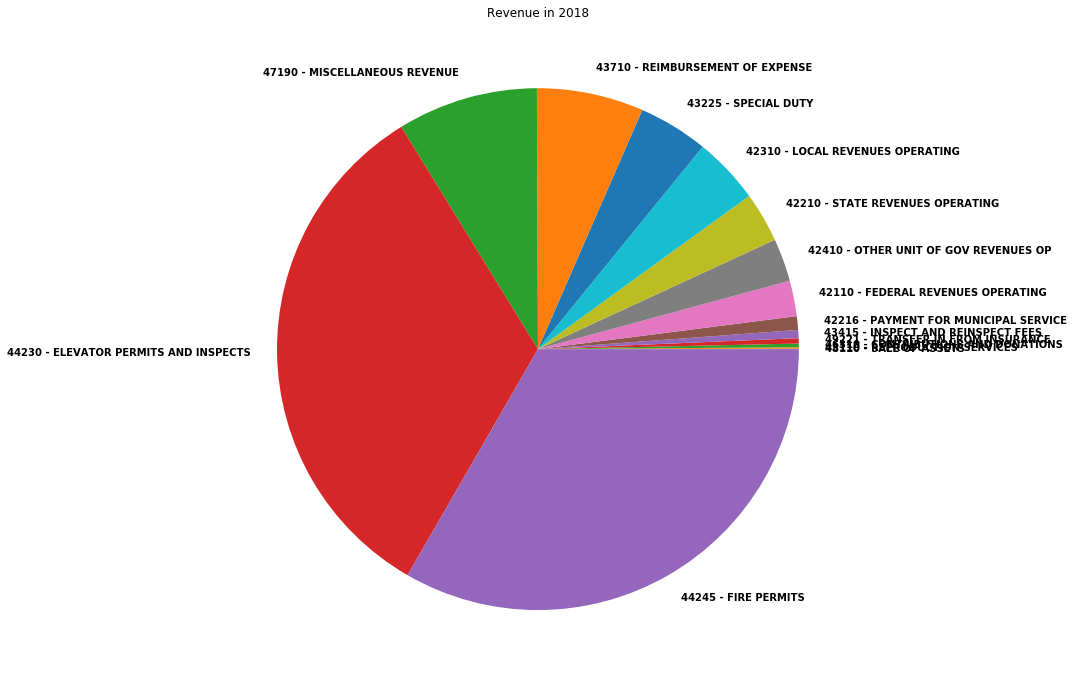

In [127]:
%matplotlib inline

revenue_by_account_type.sort_values(by = ["2018"], ascending=False, inplace = True)


#create two plots, a bar graph and a pie chart of the revenue sources for 2018. 
#TODO: Why is all revenue negative?
(revenue_by_account_type*-1).plot.bar(y = "2018", figsize = (12,12), legend = False, title = "Revenue in 2018")
(revenue_by_account_type*-1).plot.pie(y = "2018", legend = False, figsize=(12,12), label = "", title = "Revenue in 2018")




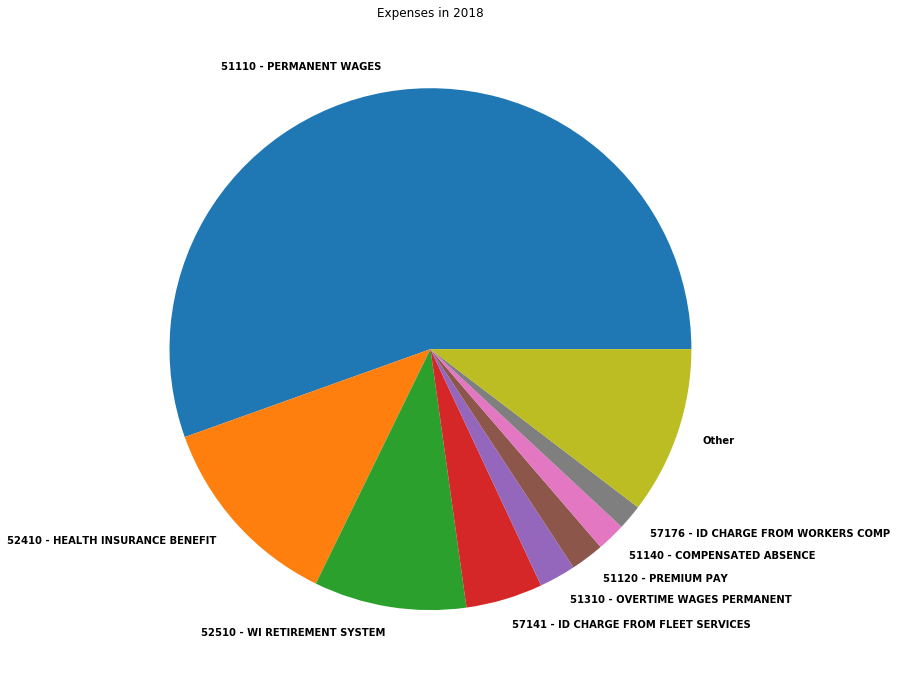

In [128]:
expense_by_account_type.sort_values(by = ["2018"], ascending=False, inplace = True)

other_expenses = Series([sum(expense_by_account_type["2018"]) - sum(expense_by_account_type["2018"].head(8))],index = ["Other"])
plotable_expenses = pd.concat([expense_by_account_type["2018"].head(8),other_expenses])

plotable_expenses.plot.pie(y = "2018", figsize = (12,12), legend = False, title = "Expenses in 2018", label = "")




In [129]:
def plot_multi(data, cols=None, spacing=.1, **kwargs):

    from pandas import plotting

    # Get default color style from pandas - can be changed to any other color list
    if cols is None: cols = data.columns
    if len(cols) == 0: return
    colors = getattr(getattr(plotting, '_style'), '_get_standard_colors')(num_colors=len(cols))

    # First axis
    ax = data.loc[:, cols[0]].plot(label=cols[0], color=colors[0], **kwargs)
    ax.set_ylabel(ylabel=cols[0])
    lines, labels = ax.get_legend_handles_labels()

    for n in range(1, len(cols)):
        # Multiple y-axes
        ax_new = ax.twinx()
        ax_new.spines['right'].set_position(('axes', 1 + spacing * (n - 1)))
        data.loc[:, cols[n]].plot(ax=ax_new, label=cols[n], color=colors[n % len(colors)])
        ax_new.set_ylabel(ylabel=cols[n])

        # Proper legend position
        line, label = ax_new.get_legend_handles_labels()
        lines += line
        labels += label

    ax.legend(lines, labels, loc=0)
    return ax

{'2015': 49737574.0, '2016': 51968347.0, '2017': 53144047.0, '2018': 55214906.0}


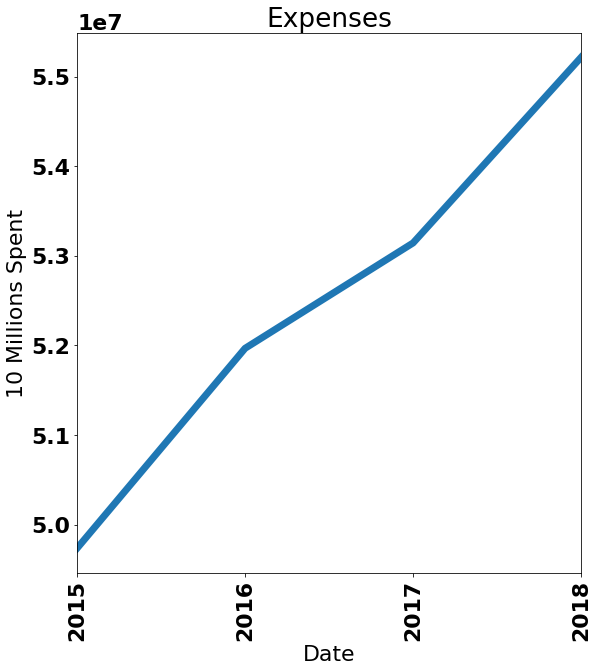

In [130]:
font = {
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)

expenses = dict()
expenses["2015"] = fire_budget[fire_budget["Account Type"] == "Expense"]["2015"].sum()
expenses["2016"] = fire_budget[fire_budget["Account Type"] == "Expense"]["2016"].sum()
expenses["2017"] = fire_budget[fire_budget["Account Type"] == "Expense"]["2017"].sum()
expenses["2018"] = fire_budget[fire_budget["Account Type"] == "Expense"]["2018"].sum()

expense_plot = pd.Series(expenses)
expense_plot.plot.line(figsize = (10,10),linewidth=7.0)

print(expenses)


# get the values we want displayed as tick labels
tick_labels = ("2015","2016","2017","2018","2019")
# get the positions for the maximum xtick label
x_max = int(max(plt.xticks()[0]))  # int() to convert numpy.int32 => int
# manually set you xtick labels
plt.xticks(range(0, x_max + 1), tick_labels, rotation=90) 

plt.xlabel('Date')
plt.ylabel('10 Millions Spent')
# change the limits and padding of the figure
plt.figure(1).subplots_adjust(
    **dict(left=0.1, right=.8, bottom=.15, top=.9, wspace=.1, hspace=.1))

plt.title("Expenses")
plt.show()
 




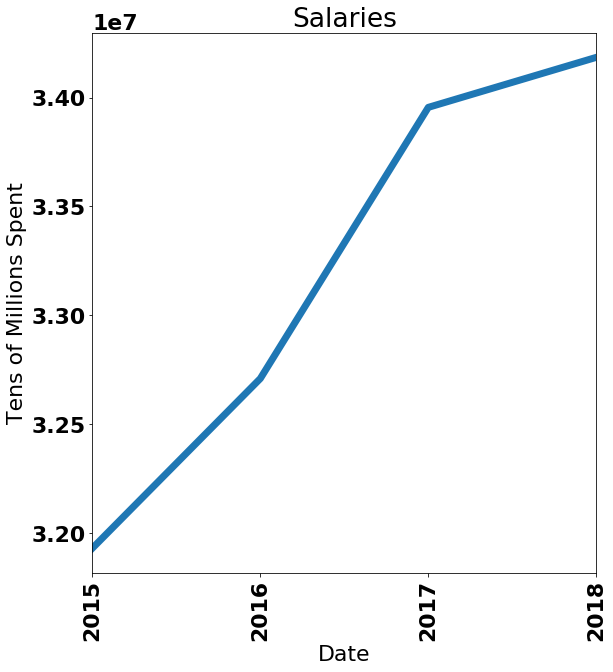

In [131]:
font = {
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)

premium = dict()
premium["2015"] = fire_budget[fire_budget["Character Code"] == "51 - SALARIES"]["2015"].sum()
premium["2016"] = fire_budget[fire_budget["Character Code"] == "51 - SALARIES"]["2016"].sum()
premium["2017"] = fire_budget[fire_budget["Character Code"] == "51 - SALARIES"]["2017"].sum()
premium["2018"] = fire_budget[fire_budget["Character Code"] == "51 - SALARIES"]["2018"].sum()

premium_plot = pd.Series(premium)
premium_plot.plot.line(figsize = (10,10),linewidth=7.0)


# get the values we want displayed as tick labels
tick_labels = ("2015","2016","2017","2018","2019")
# get the positions for the maximum xtick label
x_max = int(max(plt.xticks()[0]))  # int() to convert numpy.int32 => int
# manually set you xtick labels
plt.xticks(range(0, x_max + 1), tick_labels, rotation=90) 

plt.xlabel('Date')
plt.ylabel('Tens of Millions Spent')
# change the limits and padding of the figure
plt.figure(1).subplots_adjust(
    **dict(left=0.1, right=.8, bottom=.15, top=.9, wspace=.1, hspace=.1))

plt.title("Salaries")
plt.show()

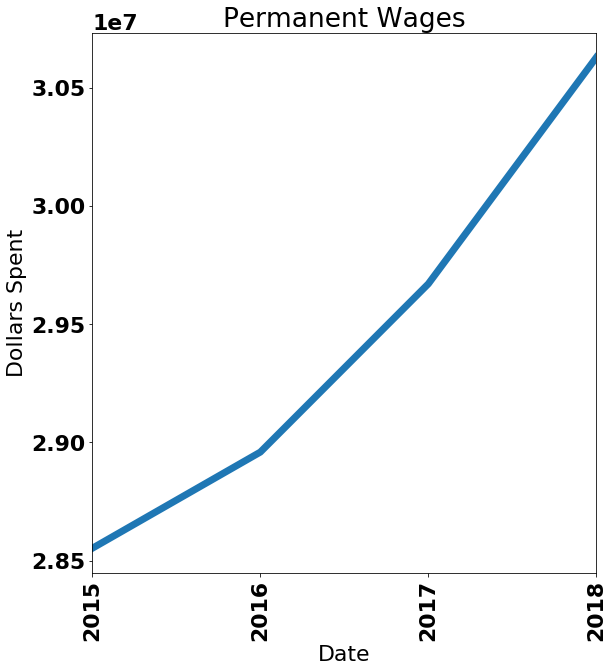

In [132]:
font = {
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)



expenses = dict()
expenses["2015"] = fire_budget[fire_budget["Object"] == "51110 - PERMANENT WAGES"]["2015"].sum()
expenses["2016"] = fire_budget[fire_budget["Object"] == "51110 - PERMANENT WAGES"]["2016"].sum()
expenses["2017"] = fire_budget[fire_budget["Object"] == "51110 - PERMANENT WAGES"]["2017"].sum()
expenses["2018"] = fire_budget[fire_budget["Object"] == "51110 - PERMANENT WAGES"]["2018"].sum()

expense_plot = pd.Series(expenses)
expense_plot.plot.line(figsize = (10,10),linewidth=7.0)


# get the values we want displayed as tick labels
tick_labels = ("2015","2016","2017","2018","2019")
# get the positions for the maximum xtick label
x_max = int(max(plt.xticks()[0]))  # int() to convert numpy.int32 => int
# manually set you xtick labels
plt.xticks(range(0, x_max + 1), tick_labels, rotation=90) 

plt.xlabel('Date')
plt.ylabel('Dollars Spent')
# change the limits and padding of the figure
plt.figure(1).subplots_adjust(
    **dict(left=0.1, right=.8, bottom=.15, top=.9, wspace=.1, hspace=.1))

plt.title("Permanent Wages")
plt.show()

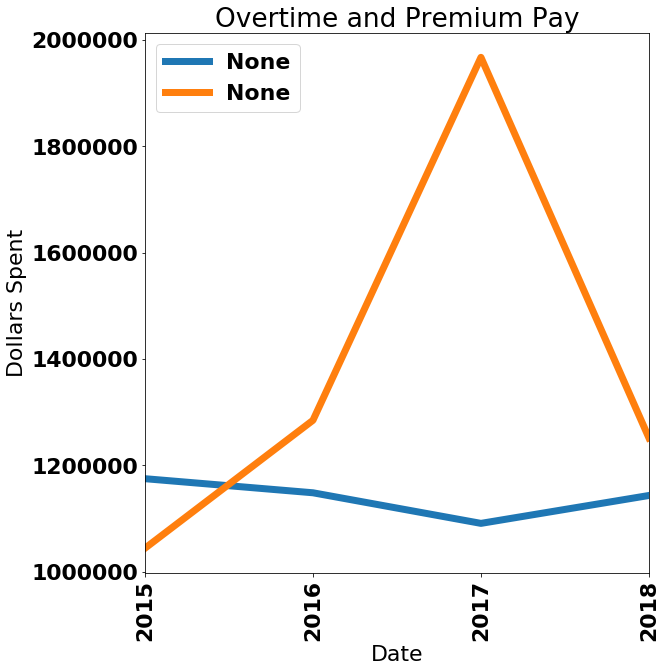

In [133]:
font = {
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)

premium = dict()
premium["2015"] = fire_budget[fire_budget["Object"] == "51120 - PREMIUM PAY"]["2015"].sum()
premium["2016"] = fire_budget[fire_budget["Object"] == "51120 - PREMIUM PAY"]["2016"].sum()
premium["2017"] = fire_budget[fire_budget["Object"] == "51120 - PREMIUM PAY"]["2017"].sum()
premium["2018"] = fire_budget[fire_budget["Object"] == "51120 - PREMIUM PAY"]["2018"].sum()

premium_plot = pd.Series(premium)
premium_plot.plot.line(figsize = (10,10),linewidth=7.0)

overtime = dict()
overtime["2015"] = fire_budget[fire_budget["Object"] == "51310 - OVERTIME WAGES PERMANENT"]["2015"].sum()
overtime["2016"] = fire_budget[fire_budget["Object"] == "51310 - OVERTIME WAGES PERMANENT"]["2016"].sum()
overtime["2017"] = fire_budget[fire_budget["Object"] == "51310 - OVERTIME WAGES PERMANENT"]["2017"].sum()
overtime["2018"] = fire_budget[fire_budget["Object"] == "51310 - OVERTIME WAGES PERMANENT"]["2018"].sum()

expense_plot = pd.Series(overtime)
expense_plot.plot.line(figsize = (10,10),linewidth=7.0)


# get the values we want displayed as tick labels
tick_labels = ("2015","2016","2017","2018","2019")
# get the positions for the maximum xtick label
x_max = int(max(plt.xticks()[0]))  # int() to convert numpy.int32 => int
# manually set you xtick labels
plt.xticks(range(0, x_max + 1), tick_labels, rotation=90) 

plt.xlabel('Date')
plt.ylabel('Dollars Spent')
# change the limits and padding of the figure
plt.figure(1).subplots_adjust(
    **dict(left=0.1, right=.8, bottom=.15, top=.9, wspace=.1, hspace=.1))

plt.title("Overtime and Premium Pay")
plt.legend()
plt.show()

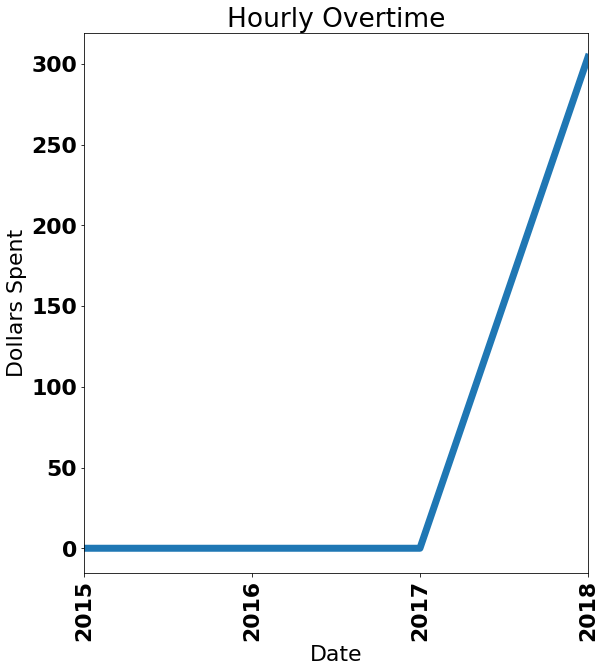

In [134]:
font = {
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)



expenses = dict()
expenses["2015"] = fire_budget[fire_budget["Object"] == "51320 - OVERTIME WAGES HOURLY"]["2015"].sum()
expenses["2016"] = fire_budget[fire_budget["Object"] == "51320 - OVERTIME WAGES HOURLY"]["2016"].sum()
expenses["2017"] = fire_budget[fire_budget["Object"] == "51320 - OVERTIME WAGES HOURLY"]["2017"].sum()
expenses["2018"] = fire_budget[fire_budget["Object"] == "51320 - OVERTIME WAGES HOURLY"]["2018"].sum()

expense_plot = pd.Series(expenses)
expense_plot.plot.line(figsize = (10,10),linewidth=7.0)


# get the values we want displayed as tick labels
tick_labels = ("2015","2016","2017","2018","2019")
# get the positions for the maximum xtick label
x_max = int(max(plt.xticks()[0]))  # int() to convert numpy.int32 => int
# manually set you xtick labels
plt.xticks(range(0, x_max + 1), tick_labels, rotation=90) 

plt.xlabel('Date')
plt.ylabel('Dollars Spent')
# change the limits and padding of the figure
plt.figure(1).subplots_adjust(
    **dict(left=0.1, right=.8, bottom=.15, top=.9, wspace=.1, hspace=.1))

plt.title("Hourly Overtime")
plt.show()

{'2015': 2219360.0, '2016': 2433485.0, '2017': 3058427.0, '2018': 2395218.0}


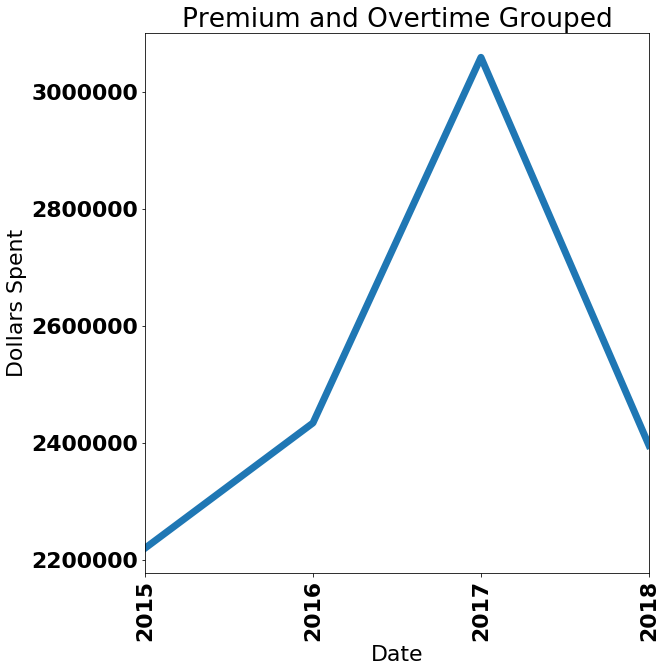

In [135]:
font = {
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)

premium = dict()
premium["2015"] = fire_budget[fire_budget["Object"] == "51120 - PREMIUM PAY"]["2015"].sum()
premium["2016"] = fire_budget[fire_budget["Object"] == "51120 - PREMIUM PAY"]["2016"].sum()
premium["2017"] = fire_budget[fire_budget["Object"] == "51120 - PREMIUM PAY"]["2017"].sum()
premium["2018"] = fire_budget[fire_budget["Object"] == "51120 - PREMIUM PAY"]["2018"].sum()
premium_plot = pd.Series(premium)


overtime = dict()
overtime["2015"] = fire_budget[fire_budget["Object"] == "51310 - OVERTIME WAGES PERMANENT"]["2015"].sum()
overtime["2016"] = fire_budget[fire_budget["Object"] == "51310 - OVERTIME WAGES PERMANENT"]["2016"].sum()
overtime["2017"] = fire_budget[fire_budget["Object"] == "51310 - OVERTIME WAGES PERMANENT"]["2017"].sum()
overtime["2018"] = fire_budget[fire_budget["Object"] == "51310 - OVERTIME WAGES PERMANENT"]["2018"].sum()
overtime_plot = pd.Series(overtime)

total = dict()
total["2015"] = overtime["2015"]+premium["2015"]
total["2016"] = overtime["2016"]+premium["2016"]
total["2017"] = overtime["2017"]+premium["2017"]
total["2018"] = overtime["2018"]+premium["2018"]
total_plot = pd.Series(total)

print(total)

total_plot.plot.line(figsize = (10,10),linewidth=7.0)


# get the values we want displayed as tick labels
tick_labels = ("2015","2016","2017","2018","2019")
# get the positions for the maximum xtick label
x_max = int(max(plt.xticks()[0]))  # int() to convert numpy.int32 => int
# manually set you xtick labels
plt.xticks(range(0, x_max + 1), tick_labels, rotation=90) 

plt.xlabel('Date')
plt.ylabel('Dollars Spent')
# change the limits and padding of the figure
plt.figure(1).subplots_adjust(
    **dict(left=0.1, right=.8, bottom=.15, top=.9, wspace=.1, hspace=.1))

plt.title("Premium and Overtime Grouped")
plt.show()

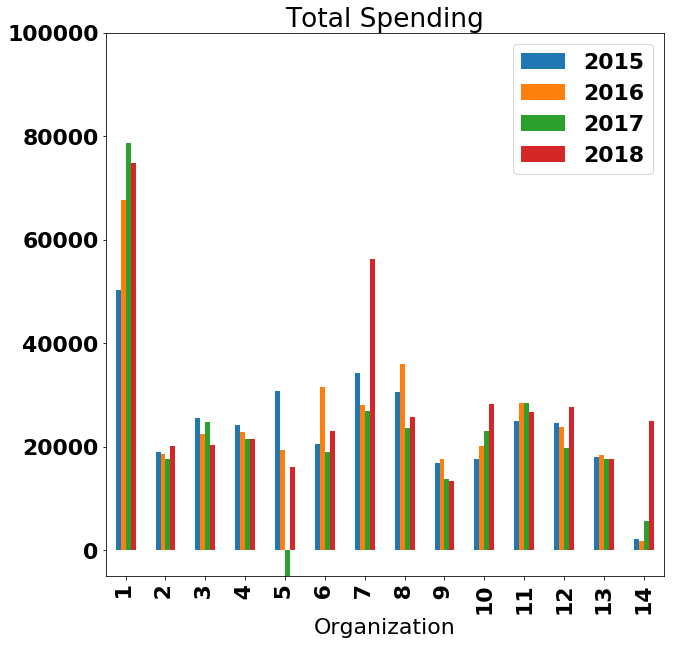

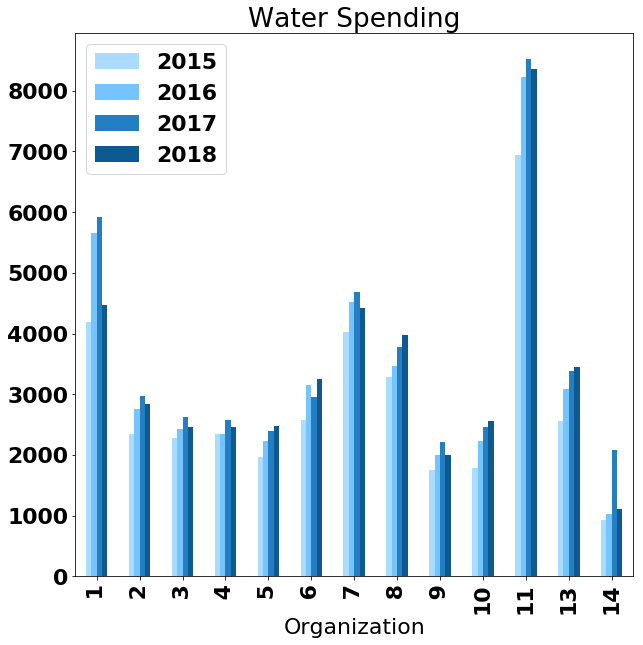

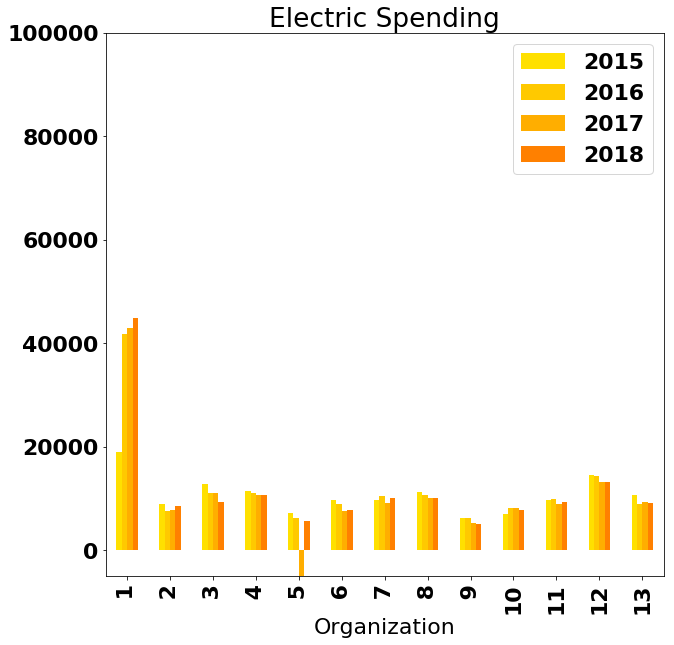

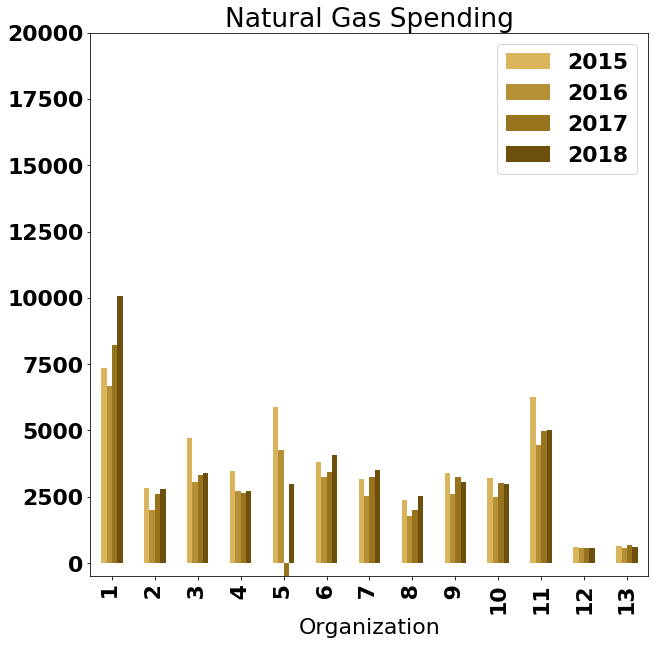

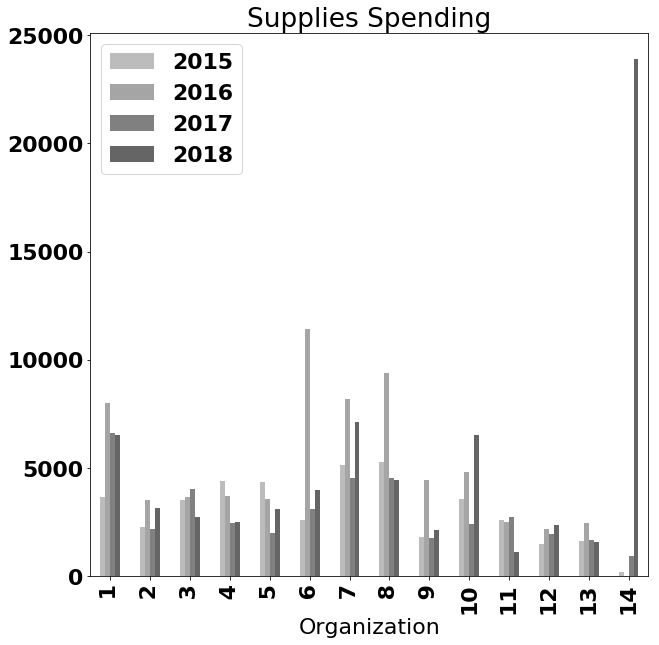

In [137]:
def last_two(x):
    return x[-2:]

blues = ["#ABDBFF","#75C4FF","#237EC2","#0D5992"]
yellows = ["#FFE000","#FFC900","#FFAE00","#FF8000"]
browns = ["#DAB45D","#B69037","#97731E","#6C4F0D"]
grays = ["#BCBCBC","#A5A5A5","#808080","#656565"]
station_data = fire_budget[fire_budget["Account Type"] == "Expense"]
station_data = station_data[station_data['Organization'].str.contains("STATION")]

station_data["Organization"] = station_data["Organization"].apply(last_two)


spending_by_station = station_data.groupby("Organization").sum()

water_spending_by_station = station_data[station_data["Object"] == "54113 - WATER"].groupby("Organization").sum()
electric_spending_by_station = station_data[station_data["Object"] == "54112 - ELECTRICITY"].groupby("Organization").sum()
gas_spending_by_station = station_data[station_data["Object"] == "54110 - NATURAL GAS"].groupby("Organization").sum()
supplies_spending_by_station = station_data[station_data["Character Code"] == "53 - SUPPLIES"].groupby("Organization").sum()


spending_by_station.plot.bar(figsize = (10,10), title = "Total Spending", ylim = (-5000,100000))
water_spending_by_station.plot.bar(figsize = (10,10), title = "Water Spending", color = blues)
electric_spending_by_station.plot.bar(figsize = (10,10), title = "Electric Spending", color = yellows, ylim = (-5000,100000))
gas_spending_by_station.plot.bar(figsize = (10,10), title = "Natural Gas Spending", color = browns, ylim = (-500,20000))
supplies_spending_by_station.plot.bar(figsize = (10,10), title = "Supplies Spending", color = grays)

